In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [ ]:
# import data set

url = 'https://raw.githubusercontent.com/YaleGu/STDM_final/main/hungary_chickenpox.csv'
df= pd.read_csv(url)
df.head(5)

,Unnamed: 0,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Total
0,1,03/01/2005,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68,1807
1,2,10/01/2005,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26,1407
2,3,17/01/2005,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44,1284
3,4,24/01/2005,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31,1255
4,5,31/01/2005,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60,1478


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  522 non-null    int64 
 1   Date        522 non-null    object
 2   BUDAPEST    522 non-null    int64 
 3   BARANYA     522 non-null    int64 
 4   BACS        522 non-null    int64 
 5   BEKES       522 non-null    int64 
 6   BORSOD      522 non-null    int64 
 7   CSONGRAD    522 non-null    int64 
 8   FEJER       522 non-null    int64 
 9   GYOR        522 non-null    int64 
 10  HAJDU       522 non-null    int64 
 11  HEVES       522 non-null    int64 
 12  JASZ        522 non-null    int64 
 13  KOMAROM     522 non-null    int64 
 14  NOGRAD      522 non-null    int64 
 15  PEST        522 non-null    int64 
 16  SOMOGY      522 non-null    int64 
 17  SZABOLCS    522 non-null    int64 
 18  TOLNA       522 non-null    int64 
 19  VAS         522 non-null    int64 
 20  VESZPREM  

In [ ]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))
df.head(5)

,Unnamed: 0,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Total
0,1,2005-01-03,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68,1807
1,2,2005-01-10,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26,1407
2,3,2005-01-17,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44,1284
3,4,2005-01-24,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31,1255
4,5,2005-01-31,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60,1478


In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)
df = df.set_index(['Date'], drop=True)
df

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Total
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68,1807
2005-01-10,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26,1407
2005-01-17,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44,1284
2005-01-24,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31,1255
2005-01-31,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60,1478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-01,95,12,41,6,39,0,16,15,14,10,56,7,13,122,4,23,4,11,110,10,608
2014-12-08,43,39,31,10,34,3,2,30,25,19,34,20,18,70,36,5,23,22,63,9,536
2014-12-15,35,7,15,0,0,0,7,7,4,2,30,36,4,72,5,21,14,0,17,10,286


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

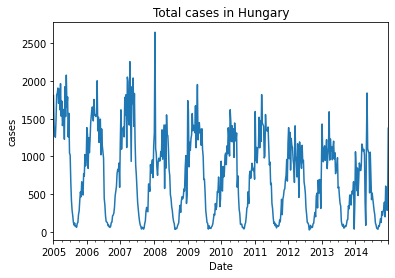

In [ ]:
df["Total"].plot()
plt.ylabel('cases')
plt.title('Total cases in Hungary')
plt.savefig('cases_total.png')
files.download("cases_total.png") 

In [ ]:
df1 = df.drop(['Total'],axis=1)
df1

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
Date,,,,,,,,,,,,,,,,,,,,
2005-01-03,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68
2005-01-10,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26
2005-01-17,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44
2005-01-24,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31
2005-01-31,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-01,95,12,41,6,39,0,16,15,14,10,56,7,13,122,4,23,4,11,110,10
2014-12-08,43,39,31,10,34,3,2,30,25,19,34,20,18,70,36,5,23,22,63,9
2014-12-15,35,7,15,0,0,0,7,7,4,2,30,36,4,72,5,21,14,0,17,10


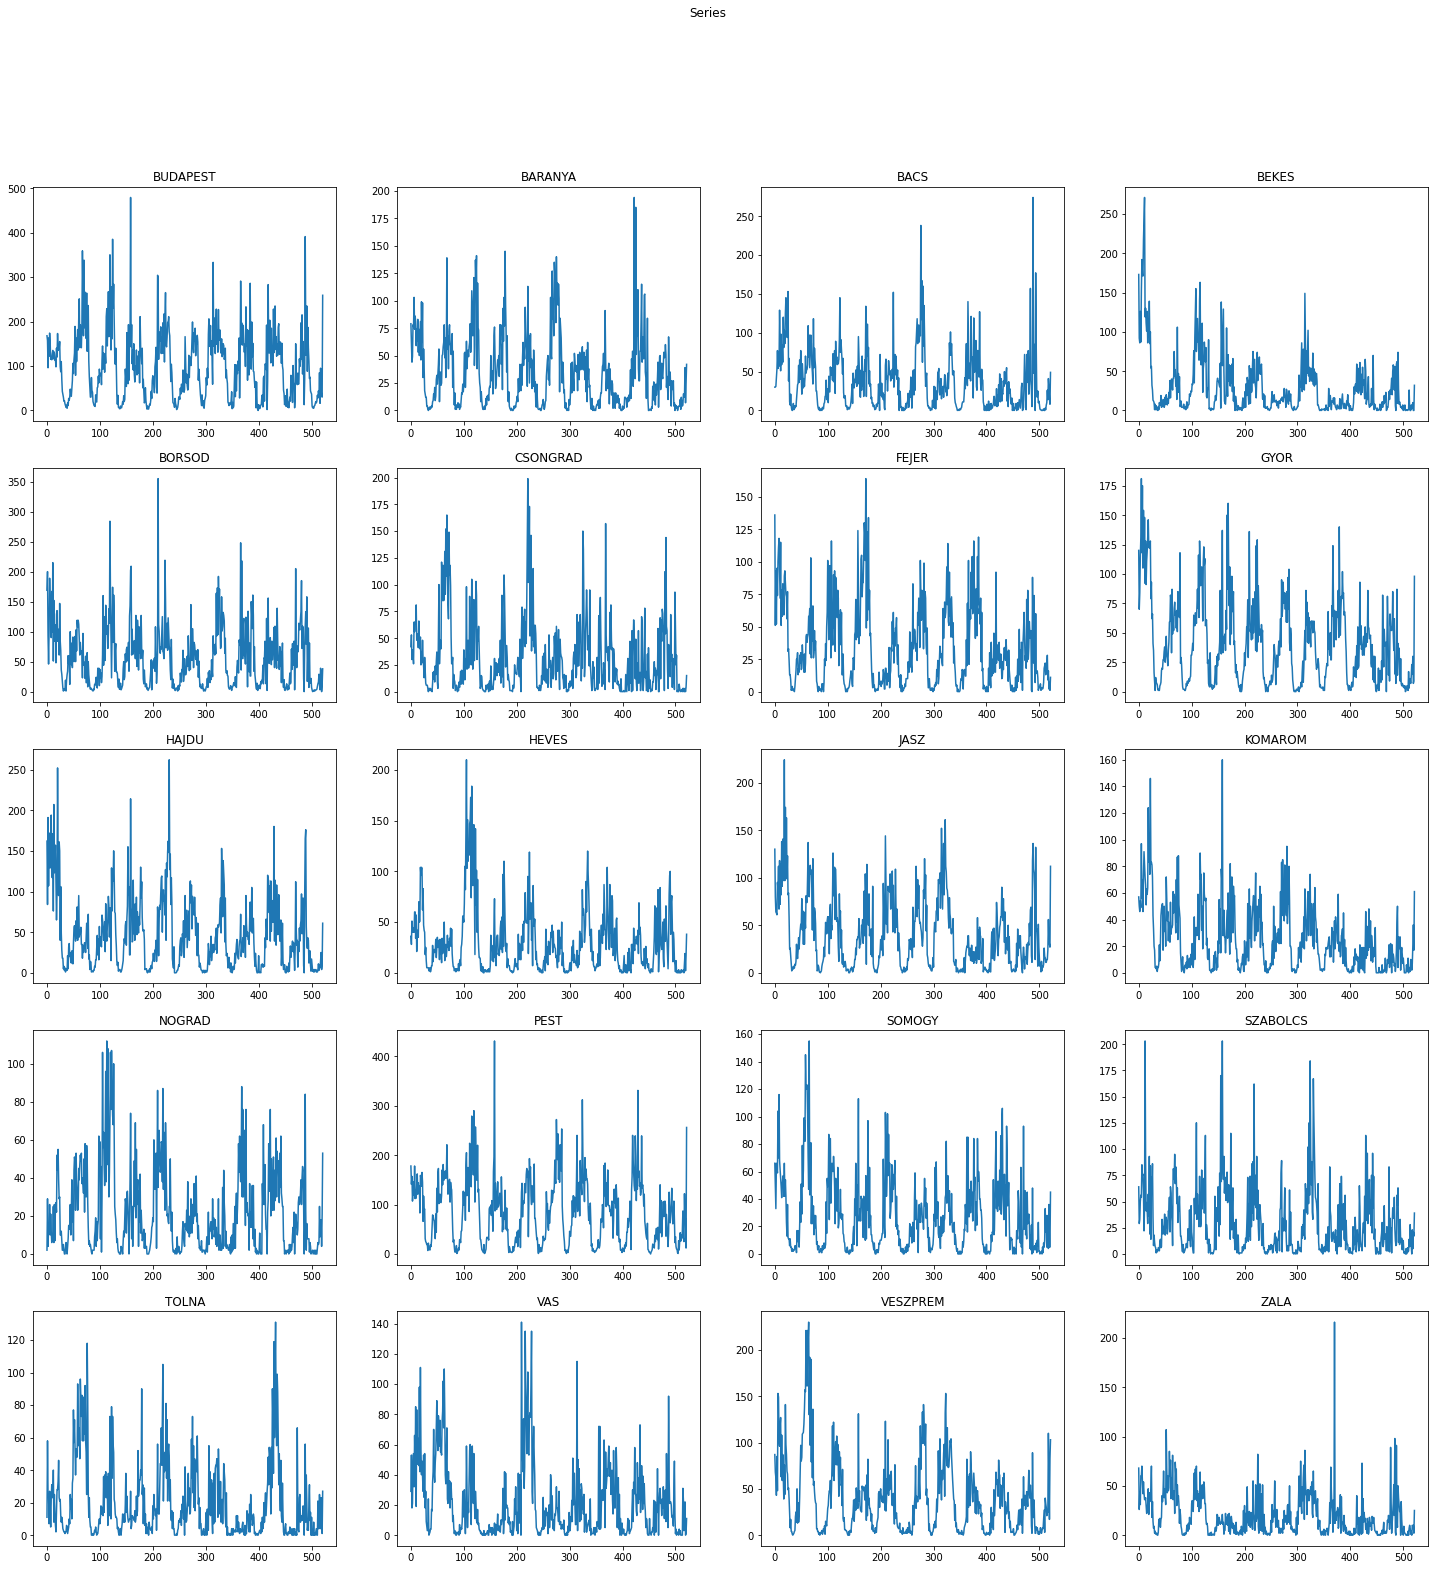

In [ ]:
fig, axs = plt.subplots(5,4,figsize=(25,25))
fig.suptitle('Series')
for i in range(5):
    for j in range(4):
        if i*4+j+1>len(df1.columns): # pass the others that we can't fill
            continue
        axs[i, j].plot(df1[df1.columns[i*4+j]].values)
        axs[i, j].set_title(df1.columns[i*4+j])
plt.show()

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df2 = df1
df2[df2.columns[1]]

Date
2005-01-03    79
2005-01-10    60
2005-01-17    44
2005-01-24    49
2005-01-31    78
              ..
2014-12-01    12
2014-12-08    39
2014-12-15     7
2014-12-22    23
2014-12-29    42
Name: BARANYA, Length: 522, dtype: int64

In [ ]:
for c in df2.columns.values:
    scaler = MinMaxScaler()
    df2[c] = scaler.fit_transform(df2[c].values.reshape(-1, 1))

In [ ]:
df2 = df2.T
df2

Date,2005-01-03,2005-01-10,2005-01-17,2005-01-24,2005-01-31,2005-02-07,2005-02-14,2005-02-21,2005-02-28,2005-03-07,2005-03-14,2005-03-21,2005-03-28,2005-04-04,2005-04-11,2005-04-18,2005-04-25,2005-05-02,2005-05-09,2005-05-16,2005-05-23,2005-05-30,2005-06-06,2005-06-13,2005-06-20,2005-06-27,2005-07-04,2005-07-11,2005-07-18,2005-07-25,2005-08-01,2005-08-08,2005-08-15,2005-08-22,2005-08-29,2005-09-05,2005-09-12,2005-09-19,2005-09-26,2005-10-03,...,2014-03-31,2014-04-07,2014-04-14,2014-04-21,2014-04-28,2014-05-05,2014-05-12,2014-05-19,2014-05-26,2014-06-02,2014-06-09,2014-06-16,2014-06-23,2014-06-30,2014-07-07,2014-07-14,2014-07-21,2014-07-28,2014-08-04,2014-08-11,2014-08-18,2014-08-25,2014-09-01,2014-09-08,2014-09-15,2014-09-22,2014-09-29,2014-10-06,2014-10-13,2014-10-20,2014-10-27,2014-11-03,2014-11-10,2014-11-17,2014-11-24,2014-12-01,2014-12-08,2014-12-15,2014-12-22,2014-12-29
BUDAPEST,0.350731,0.327766,0.200418,0.340292,0.254697,0.363257,0.319415,0.240084,0.248434,0.237996,0.265136,0.281837,0.242171,0.275574,0.269311,0.235908,0.237996,0.204593,0.292276,0.250522,0.361169,0.281837,0.298539,0.290188,0.323591,0.204593,0.181628,0.229645,0.146138,0.089770,0.077244,0.062630,0.043841,0.045929,0.031315,0.022965,0.014614,0.025052,0.010438,0.035491,...,0.448852,0.171190,0.323591,0.167015,0.027140,0.146138,0.816284,0.371608,0.258873,0.490605,0.183716,0.390397,0.292276,0.231733,0.150313,0.156576,0.091858,0.083507,0.077244,0.020877,0.012526,0.014614,0.010438,0.020877,0.022965,0.033403,0.041754,0.035491,0.043841,0.070981,0.058455,0.091858,0.068894,0.177453,0.033403,0.198330,0.089770,0.073069,0.062630,0.540710
BARANYA,0.407216,0.309278,0.226804,0.252577,0.402062,0.391753,0.530928,0.381443,0.443299,0.417526,0.304124,0.381443,0.324742,0.427835,0.273196,0.381443,0.257732,0.340206,0.417526,0.237113,0.510309,0.319588,0.505155,0.154639,0.288660,0.206186,0.092784,0.077320,0.061856,0.061856,0.020619,0.020619,0.005155,0.000000,0.005155,0.015464,0.005155,0.015464,0.010309,0.020619,...,0.262887,0.108247,0.159794,0.108247,0.051546,0.345361,0.180412,0.118557,0.180412,0.087629,0.020619,0.139175,0.103093,0.097938,0.139175,0.020619,0.036082,0.000000,0.025773,0.010309,0.020619,0.015464,0.000000,0.010309,0.020619,0.020619,0.020619,0.051546,0.005155,0.061856,0.036082,0.020619,0.025773,0.077320,0.077320,0.061856,0.201031,0.036082,0.118557,0.216495
BACS,0.109489,0.109489,0.113139,0.156934,0.193431,0.281022,0.197080,0.233577,0.208029,0.470803,0.295620,0.186131,0.357664,0.215328,0.306569,0.226277,0.437956,0.295620,0.375912,0.313869,0.456204,0.529197,0.470803,0.343066,0.343066,0.558394,0.138686,0.244526,0.040146,0.025547,0.076642,0.021898,0.003650,0.000000,0.007299,0.032847,0.003650,0.021898,0.010949,0.021898,...,0.248175,0.572993,0.138686,0.091241,0.018248,0.145985,1.000000,0.175182,0.291971,0.310219,0.000000,0.645985,0.306569,0.091241,0.062044,0.091241,0.036496,0.043796,0.029197,0.007299,0.003650,0.003650,0.000000,0.000000,0.000000,0.003650,0.007299,0.000000,0.000000,0.010949,0.003650,0.025547,0.036496,0.094891,0.051095,0.149635,0.113139,0.054745,0.029197,0.178832
BEKES,0.638376,0.339483,0.317343,0.464945,0.321033,0.560886,0.708487,0.642066,0.630996,0.800738,0.896679,1.000000,0.439114,0.479705,0.409594,0.372694,0.464945,0.317343,0.428044,0.346863,0.512915,0.313653,0.369004,0.199262,0.206642,0.118081,0.095941,0.047970,0.044280,0.036900,0.003690,0.029520,0.003690,0.022140,0.003690,0.007380,0.000000,0.018450,0.003690,0.036900,...,0.199262,0.095941,0.206642,0.022140,0.000000,0.217712,0.228782,0.033210,0.273063,0.099631,0.029520,0.040590,0.029520,0.014760,0.018450,0.011070,0.007380,0.025830,0.000000,0.014760,0.003690,0.025830,0.000000,0.000000,0.003690,0.003690,0.000000,0.003690,0.003690,0.095941,0.007380,0.000000,0.000000,0.025830,0.007380,0.022140,0.036900,0.000000,0.000000,0.118081
BORSOD,0.476056,0.563380,0.261972,0.129577,0.290141,0.532394,0.416901,0.394366,0.253521,0.470423,0.278873,0.605634,0.143662,0.428169,0.290141,0.236620,0.312676,0.135211,0.363380,0.380282,

In [ ]:
!pip install tslearn
import math
import tslearn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

     |████████████████████████████████| 798kB 5.7MB/s 


/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [ ]:
cluster_count = math.ceil(math.sqrt(len(df2))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

labels = TimeSeriesKMeans(n_clusters=6, metric="dtw").fit_predict(df2)
labels

array([3, 3, 1, 5, 5, 1, 2, 4, 2, 1, 4, 5, 3, 3, 0, 5, 3, 0, 4, 1])

In [ ]:
df3 = np.array(df2)

In [ ]:
tslearn.clustering.silhouette_score(df3, labels, metric="dtw")

0.028231487070603366

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

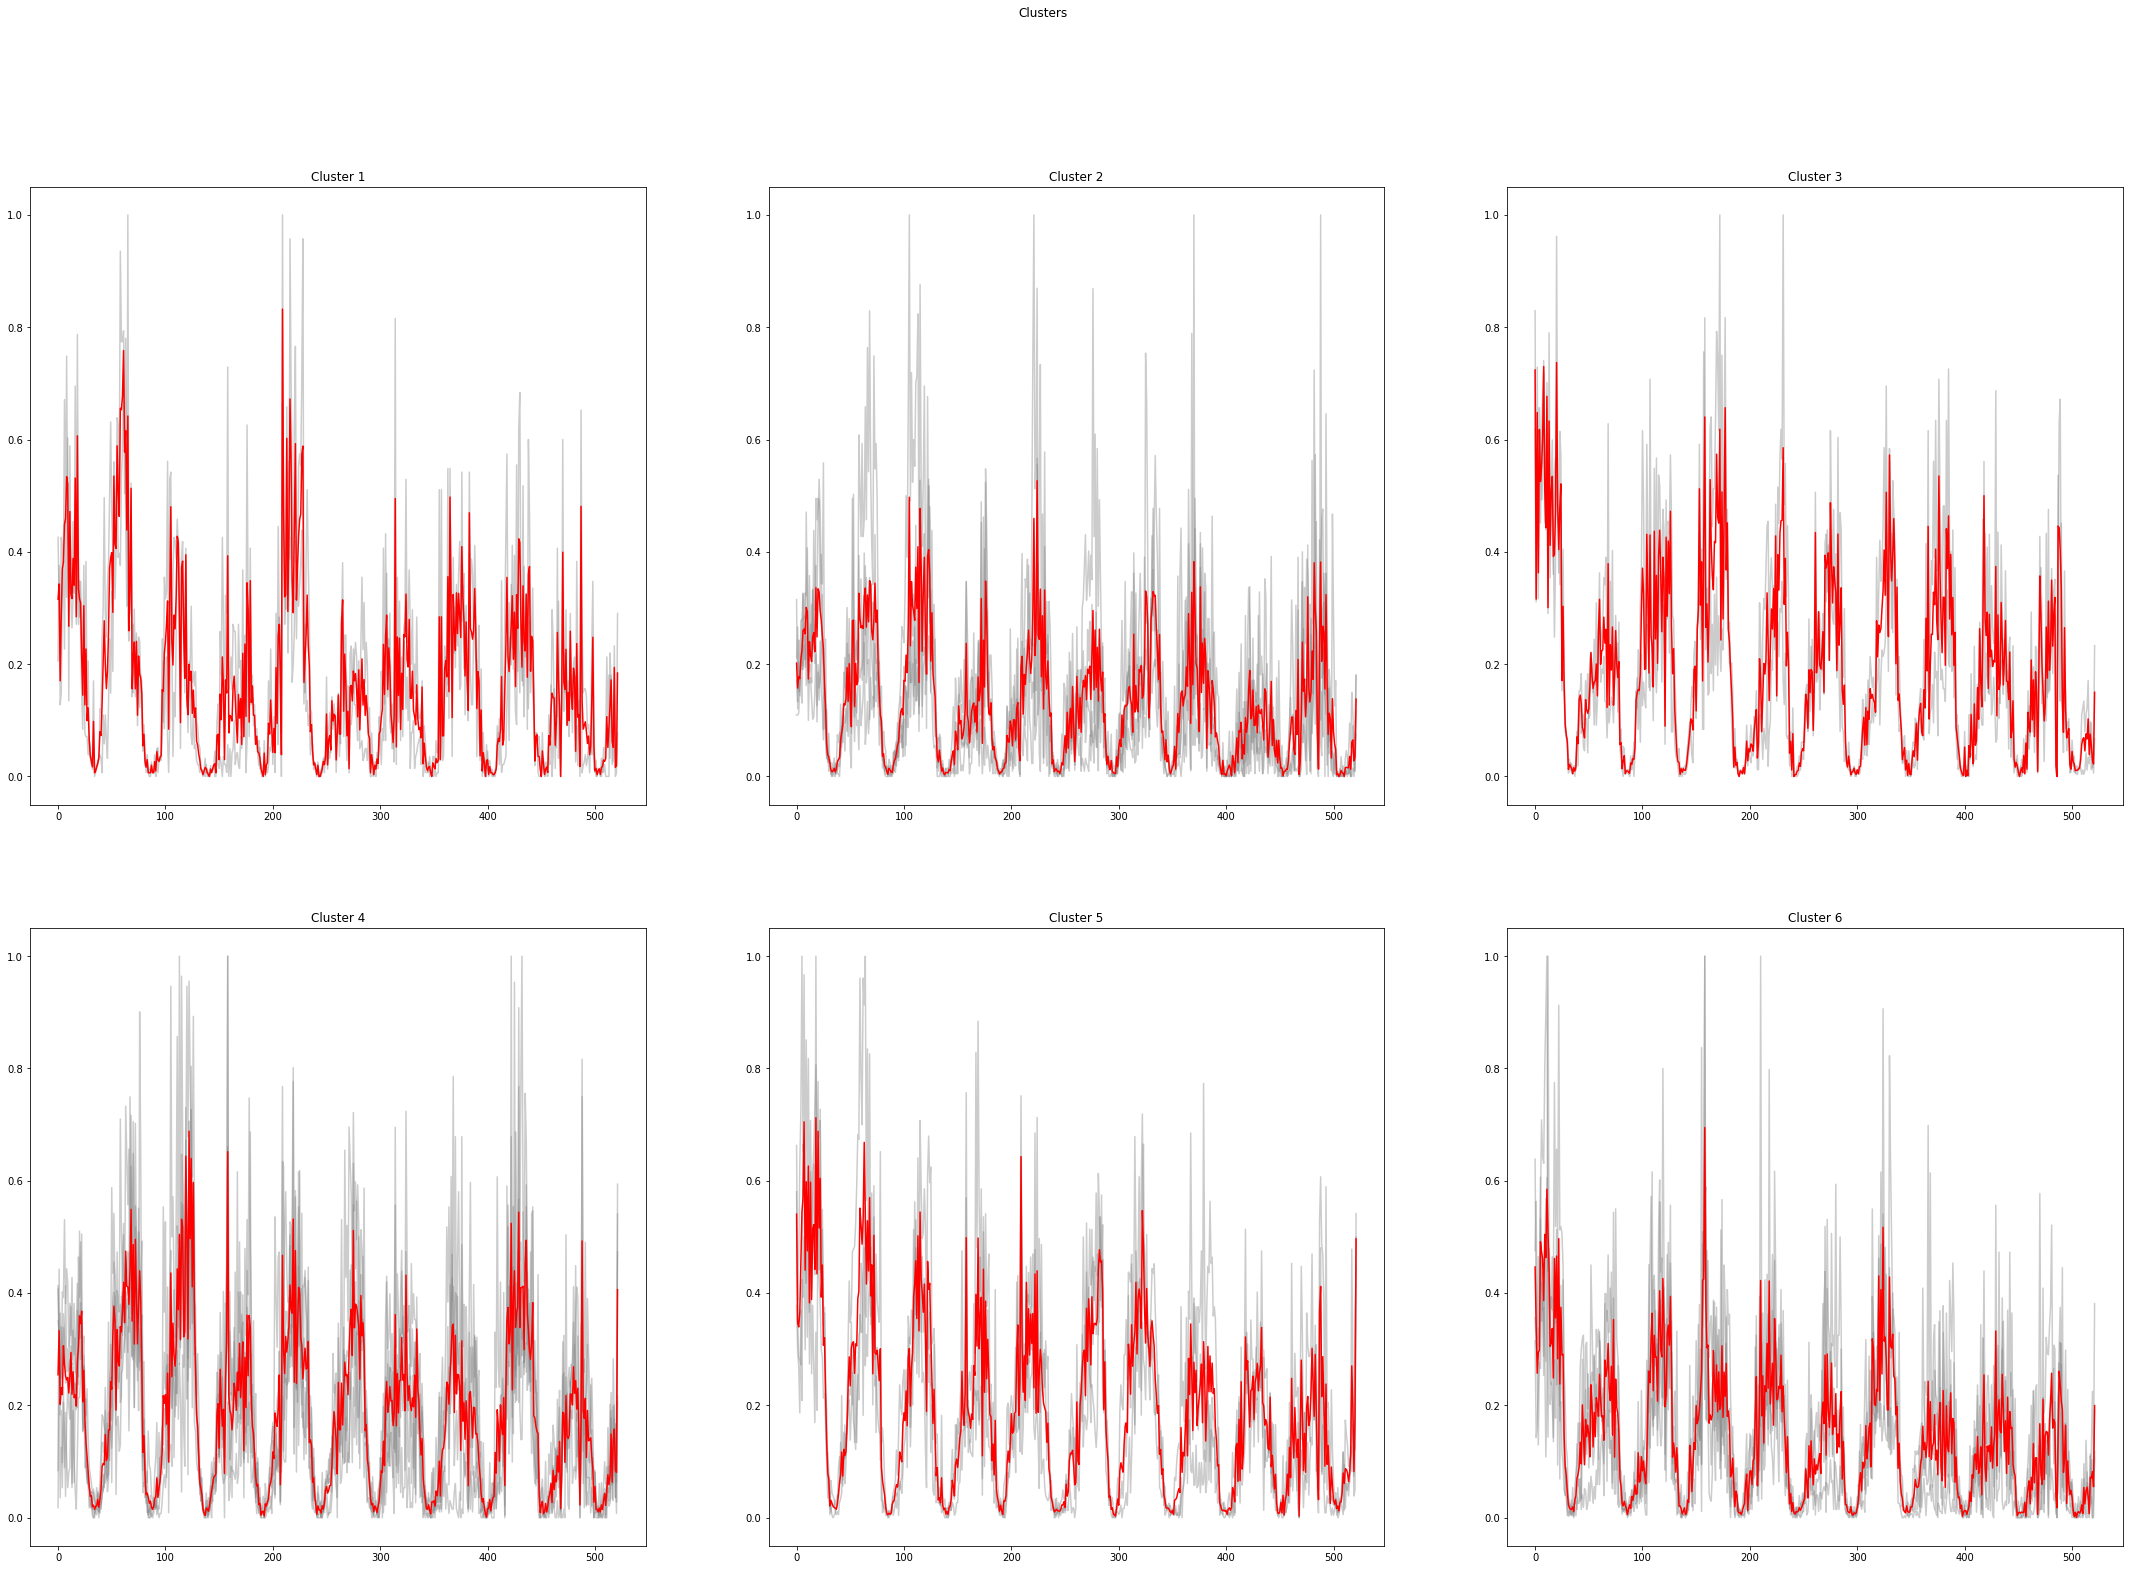

In [ ]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(2,plot_count,figsize=(37.5,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in range(6):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(df3[i],c="gray",alpha=0.4)
                cluster.append(df3[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(label + 1))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.savefig('clustering.png')
files.download("clustering.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

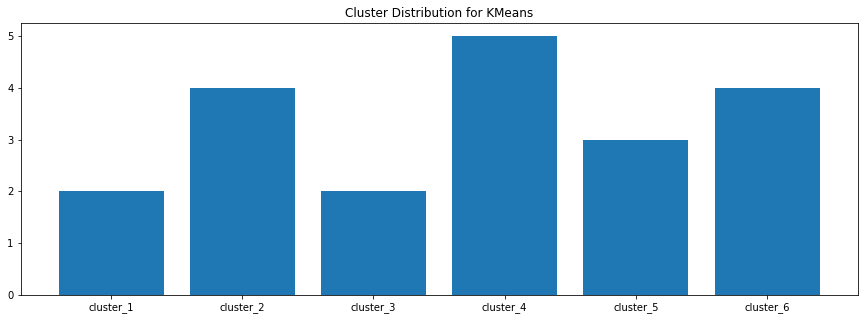

In [ ]:
cluster_c = [len(labels[labels==i]) for i in range(6)]
cluster_n = ["cluster_"+str(i + 1) for i in range(6)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.savefig('clustering_result.png')
files.download("clustering_result.png") 

In [ ]:
df2['clustering'] = labels
df2

Date,2005-01-03 00:00:00,2005-01-10 00:00:00,2005-01-17 00:00:00,2005-01-24 00:00:00,2005-01-31 00:00:00,2005-02-07 00:00:00,2005-02-14 00:00:00,2005-02-21 00:00:00,2005-02-28 00:00:00,2005-03-07 00:00:00,2005-03-14 00:00:00,2005-03-21 00:00:00,2005-03-28 00:00:00,2005-04-04 00:00:00,2005-04-11 00:00:00,2005-04-18 00:00:00,2005-04-25 00:00:00,2005-05-02 00:00:00,2005-05-09 00:00:00,2005-05-16 00:00:00,2005-05-23 00:00:00,2005-05-30 00:00:00,2005-06-06 00:00:00,2005-06-13 00:00:00,2005-06-20 00:00:00,2005-06-27 00:00:00,2005-07-04 00:00:00,2005-07-11 00:00:00,2005-07-18 00:00:00,2005-07-25 00:00:00,2005-08-01 00:00:00,2005-08-08 00:00:00,2005-08-15 00:00:00,2005-08-22 00:00:00,2005-08-29 00:00:00,2005-09-05 00:00:00,2005-09-12 00:00:00,2005-09-19 00:00:00,2005-09-26 00:00:00,2005-10-03 00:00:00,...,2014-04-07 00:00:00,2014-04-14 00:00:00,2014-04-21 00:00:00,2014-04-28 00:00:00,2014-05-05 00:00:00,2014-05-12 00:00:00,2014-05-19 00:00:00,2014-05-26 00:00:00,2014-06-02 00:00:00,2014-06-09 00:00:00,2014-06-16 00:00:00,2014-06-23 00:00:00,2014-06-30 00:00:00,2014-07-07 00:00:00,2014-07-14 00:00:00,2014-07-21 00:00:00,2014-07-28 00:00:00,2014-08-04 00:00:00,2014-08-11 00:00:00,2014-08-18 00:00:00,2014-08-25 00:00:00,2014-09-01 00:00:00,2014-09-08 00:00:00,2014-09-15 00:00:00,2014-09-22 00:00:00,2014-09-29 00:00:00,2014-10-06 00:00:00,2014-10-13 00:00:00,2014-10-20 00:00:00,2014-10-27 00:00:00,2014-11-03 00:00:00,2014-11-10 00:00:00,2014-11-17 00:00:00,2014-11-24 00:00:00,2014-12-01 00:00:00,2014-12-08 00:00:00,2014-12-15 00:00:00,2014-12-22 00:00:00,2014-12-29 00:00:00,clustering
BUDAPEST,0.350731,0.327766,0.200418,0.340292,0.254697,0.363257,0.319415,0.240084,0.248434,0.237996,0.265136,0.281837,0.242171,0.275574,0.269311,0.235908,0.237996,0.204593,0.292276,0.250522,0.361169,0.281837,0.298539,0.290188,0.323591,0.204593,0.181628,0.229645,0.146138,0.089770,0.077244,0.062630,0.043841,0.045929,0.031315,0.022965,0.014614,0.025052,0.010438,0.035491,...,0.171190,0.323591,0.167015,0.027140,0.146138,0.816284,0.371608,0.258873,0.490605,0.183716,0.390397,0.292276,0.231733,0.150313,0.156576,0.091858,0.083507,0.077244,0.020877,0.012526,0.014614,0.010438,0.020877,0.022965,0.033403,0.041754,0.035491,0.043841,0.070981,0.058455,0.091858,0.068894,0.177453,0.033403,0.198330,0.089770,0.073069,0.062630,0.540710,3
BARANYA,0.407216,0.309278,0.226804,0.252577,0.402062,0.391753,0.530928,0.381443,0.443299,0.417526,0.304124,0.381443,0.324742,0.427835,0.273196,0.381443,0.257732,0.340206,0.417526,0.237113,0.510309,0.319588,0.505155,0.154639,0.288660,0.206186,0.092784,0.077320,0.061856,0.061856,0.020619,0.020619,0.005155,0.000000,0.005155,0.015464,0.005155,0.015464,0.010309,0.020619,...,0.108247,0.159794,0.108247,0.051546,0.345361,0.180412,0.118557,0.180412,0.087629,0.020619,0.139175,0.103093,0.097938,0.139175,0.020619,0.036082,0.000000,0.025773,0.010309,0.020619,0.015464,0.000000,0.010309,0.020619,0.020619,0.020619,0.051546,0.005155,0.061856,0.036082,0.020619,0.025773,0.077320,0.077320,0.061856,0.201031,0.036082,0.118557,0.216495,3
BACS,0.109489,0.109489,0.113139,0.156934,0.193431,0.281022,0.197080,0.233577,0.208029,0.470803,0.295620,0.186131,0.357664,0.215328,0.306569,0.226277,0.437956,0.295620,0.375912,0.313869,0.456204,0.529197,0.470803,0.343066,0.343066,0.558394,0.138686,0.244526,0.040146,0.025547,0.076642,0.021898,0.003650,0.000000,0.007299,0.032847,0.003650,0.021898,0.010949,0.021898,...,0.572993,0.138686,0.091241,0.018248,0.145985,1.000000,0.175182,0.291971,0.310219,0.000000,0.645985,0.306569,0.091241,0.062044,0.091241,0.036496,0.043796,0.029197,0.007299,0.003650,0.003650,0.000000,0.000000,0.000000,0.003650,0.007299,0.000000,0.000000,0.010949,0.003650,0.025547,0.036496,0.094891,0.051095,0.149635,0.113139,0.054745,0.029197,0.178832,1
BEKES,0.638376,0.339483,0.317343,0.464945,0.321033,0.560886,0.708487,0.642066,0.630996,0.800738,0.896679,1.000000,0.439114,0.479705,0.409594,0.372694,0.464945,0.317343,0.428044,0.346863,0.512915,0.313653,0.369004,0.199262,0.206

In [ ]:
df_export = df2.T
df_export.to_csv('clustering result.csv')
files.download("clustering result.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>